# Loss functions

A loss function measures the difference between predicted
outputs and the
according label. We can then run back propogation to compute the
gradients. Let's first import the modules, where the `mxnet.gluon.loss` module
is imported as `gloss` to avoid the commonly used name `loss`.

In [1]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import nd, autograd
from mxnet.gluon import nn, loss as gloss  

## Basic Usages

Now let's create an instance of the $\ell_2$ loss.

In [2]:
loss = gloss.L2Loss()

and then feed two inputs to compute the elemental-wise loss values.

In [3]:
x = nd.ones((2,))
y = nd.ones((2,)) * 2
loss(x, y)


[0.5 0.5]
<NDArray 2 @cpu(0)>

These values should be equal to the math definition: $0.5\|x-y\|^2$.

In [4]:
.5 * (x - y)**2


[0.5 0.5]
<NDArray 2 @cpu(0)>

In a mini-batch, some examples may be more important than others. We can apply
weights to individual examples during the forward function (the default weight
value is 1).

In [5]:
loss(x, y, nd.array([1, 2]))


[0.5 1. ]
<NDArray 2 @cpu(0)>

Next we show how to use a loss function to compute gradients.

In [6]:
X = nd.random.uniform(shape=(2, 4)) 
net = nn.Dense(1)
net.initialize()
with autograd.record():
    l =  loss(net(X), y)
l


[1.9893507 1.9883885]
<NDArray 2 @cpu(0)>

Since the both network forward and loss are recorded, we can compute the
gradients w.r.t. the loss function.

In [7]:
l.backward()
net.weight.grad()


[[-2.2967231 -2.8934312 -2.5131638 -3.3736074]]
<NDArray 1x4 @cpu(0)>

## Visualize Loss Functions

Let's first visualize several regression losses. We
visualize the loss values versus the predicted values with label values fixed to
be 0.

In [8]:
def plot(x, y):
    display.set_matplotlib_formats('svg')
    plt.plot(x.asnumpy(), y.asnumpy())
    plt.xlabel('x')
    plt.ylabel('loss')
    plt.show()
    
def show_regression_loss(loss):
    x = nd.arange(-5, 5, .1)
    y = loss(x, nd.zeros_like(x))
    plot(x, y)    

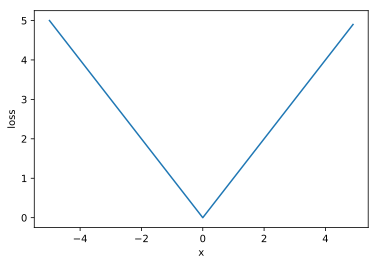

In [9]:
show_regression_loss(gloss.L1Loss())

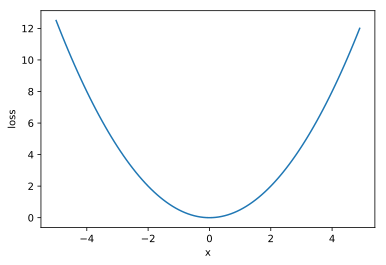

In [10]:
show_regression_loss(gloss.L2Loss())

Then plot the classification losses with label values fixed to be 1.

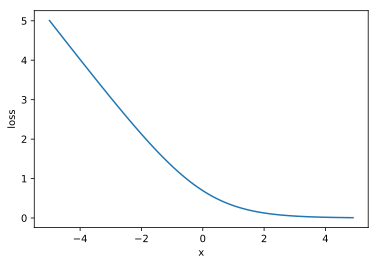

In [11]:
def show_classification_loss(loss):
    x = nd.arange(-5, 5, .1)
    y = loss(x, nd.ones_like(x))
    plot(x, y) 
    
show_classification_loss(gloss.LogisticLoss())

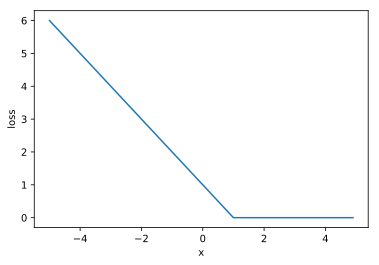

In [12]:
show_classification_loss(gloss.HingeLoss() )

## Cross Entropy Loss with Softmax

In classification, we often apply the
softmax operator to the predicted outputs to obtain prediction probabilities,
and then apply the cross entropy loss against the true labels. Running these two
steps one-by-one, however, may need to numerical instabilities. The `loss`
module provides a single operators with softmax and cross entropy fused to avoid
such problem.

In [13]:
loss = gloss.SoftmaxCrossEntropyLoss()
x = nd.array([[1, 10], [8, 2]])
y = nd.array([0, 1])
loss(x, y)


[9.000123  6.0024757]
<NDArray 2 @cpu(0)>

For binary classification, we can use `SigmoidBinaryCrossEntropyLoss`.